# Esse documento foi feito pra testar diferentes tratamentos de dados com FFT em respiração 


## Exemplo amigável

In [1]:
import importlib
import aux
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.signal import welch, butter, filtfilt
importlib.reload(aux)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<module 'aux' from '/home/oestefal/Desktop/paradas_almir/respiratory_data_threatment/aux.py'>

Filtered frequencies: [ 5.   5.2  5.4  5.6  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6
  7.8  8.   8.2  8.4  8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4
 10.6 10.8 11.  11.2 11.4 11.6 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2
 13.4 13.6 13.8 14.  14.2 14.4 14.6 14.8 15.  15.2 15.4 15.6 15.8 16.
 16.2 16.4 16.6 16.8 17.  17.2 17.4 17.6 17.8 18.  18.2 18.4 18.6 18.8
 19.  19.2 19.4 19.6 19.8 20.  20.2 20.4 20.6 20.8 21.  21.2 21.4 21.6
 21.8 22.  22.2 22.4 22.6 22.8 23.  23.2 23.4 23.6 23.8 24.  24.2 24.4
 24.6 24.8 25.  25.2 25.4 25.6 25.8 26.  26.2 26.4 26.6 26.8 27.  27.2
 27.4 27.6 27.8 28.  28.2 28.4 28.6 28.8 29.  29.2 29.4 29.6 29.8 30. ]


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


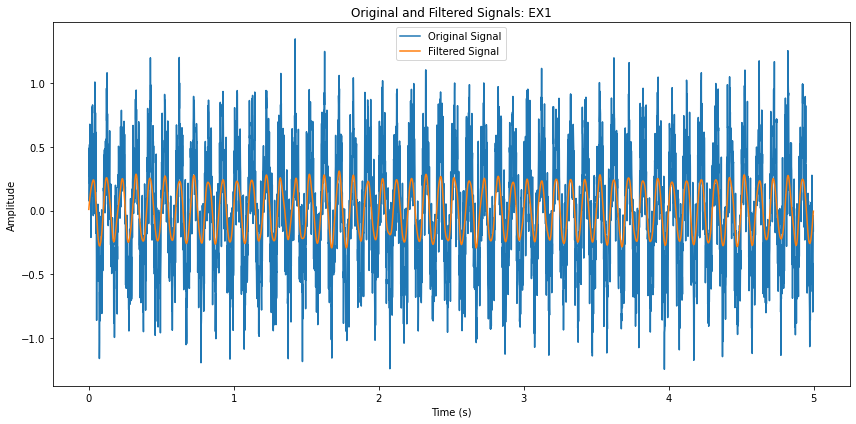

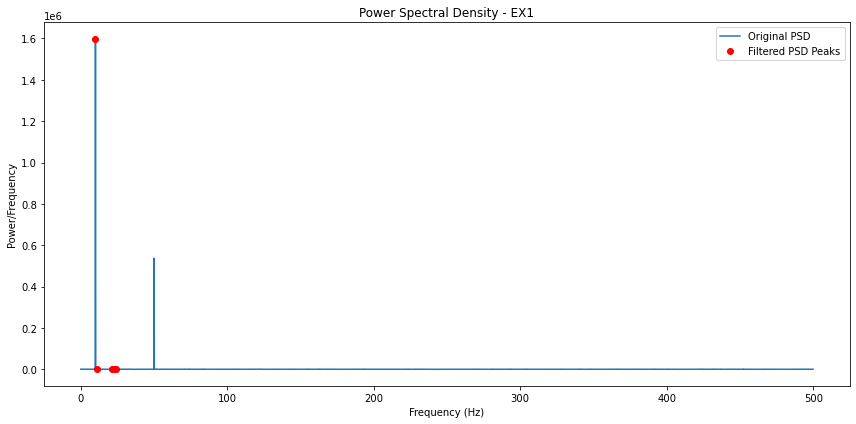

freq:  23.400000000000002 - psd:  680.1291919620766
freq:  21.200000000000003 - psd:  712.3662585978077
freq:  24.0 - psd:  779.4140899986062
freq:  11.200000000000001 - psd:  802.7891341768726
freq:  10.0 - psd:  1597891.8798989567


In [2]:
# Example usage:
# Generate a sample signal (sine wave with noise)
fs = 1000  # Sampling frequency
t = np.arange(0, 5, 1/fs)  # Time vector from 0 to 5 seconds
f1, f2 = 10, 50  # Frequencies of the sine waves
signal = 0.5 * np.sin(2 * np.pi * f1 * t) + 0.3 * np.sin(2 * np.pi * f2 * t)
noise = 0.2 * np.random.randn(len(t))  # Gaussian noise
noisy_signal = signal + noise

# Define the band mask and the number of most significant frequencies to keep
band_mask = (5, 30)  # Keep frequencies between 5 Hz and 30 Hz
n_most_significant = 5

# Process the signal
filtered_signal, filtered_frequencies, filtered_psd, filtered_fft, new_values = aux.filter_frequencies(noisy_signal, fs, band_mask, n_most_significant)

# Plot the results
freqs = np.fft.fftfreq(len(noisy_signal), 1/fs)
psd = np.abs(np.fft.fft(noisy_signal)) ** 2


#aux.plot_results(noisy_signal, filtered_signal, freqs, psd, filtered_frequencies, filtered_psd, fs = fs)

aux.plot_signals(noisy_signal, filtered_signal, fs = fs, label = "EX1")
aux.plot_spectral_densities(freqs, psd, filtered_frequencies, filtered_psd, fs = fs, label = "EX1")

for i in range(n_most_significant):
    print("freq: ", filtered_frequencies[i], "- psd: ", filtered_psd[i])

## Agora com dados de verdade

In [28]:
import pandas as pd
data = pd.read_csv('../samples.csv', header = None)
data = data.rename(columns={0: 'time_stamp', 1: 'value'})
data.head()


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


,time_stamp,value
0,1707860375107,39530.418750
1,1707860375235,40050.379687
2,1707860375362,39337.734375
3,1707860375489,39622.238672
4,1707860375617,39388.007227


In [31]:
import importlib
import aux_module as aux
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.signal import welch, butter, filtfilt
importlib.reload(aux)

<module 'aux_module' from '/home/oestefal/Desktop/paradas_almir/NurseAid-Apnea/data_analysis/aux_module.py'>

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


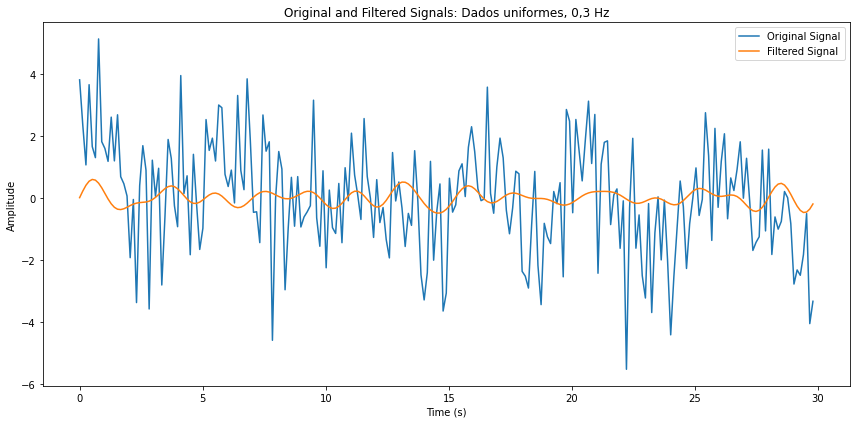

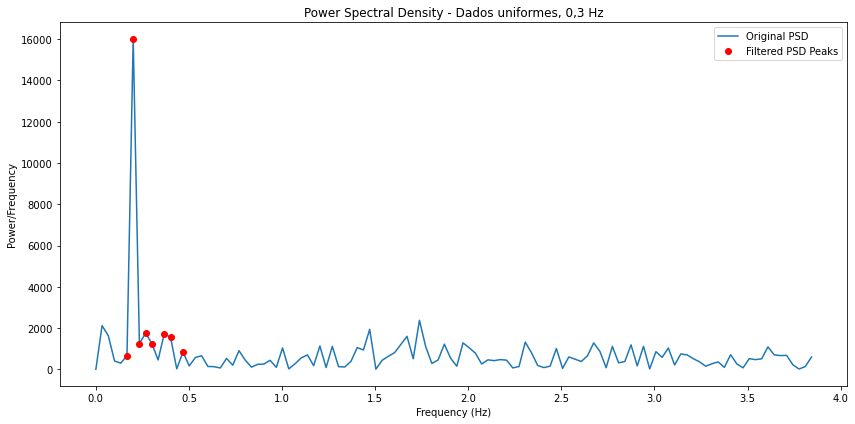

freq:  0.167117884956048 - psd:  656.2321289358648
freq:  0.46793007787693447 - psd:  838.6756834822879
freq:  0.23396503893846723 - psd:  1240.5797072956343
freq:  0.30081219292088646 - psd:  1248.0318563055293
freq:  0.4010829238945153 - psd:  1547.6729589428219
freq:  0.36765934690330565 - psd:  1730.759093936269
freq:  0.26738861592967683 - psd:  1755.4466226410298
freq:  0.20054146194725764 - psd:  16013.999934687725


In [47]:
duration = (data["time_stamp"].to_list()[-1] - data["time_stamp"].to_list()[0])
fs = data.size/29.919/2 # Sampling frequency

noisy_signal = data["value"].to_list()
noisy_signal = noisy_signal - np.mean(noisy_signal)

# Define the band mask and the number of most significant frequencies to keep
band_mask = (0.1, 0.7)  # Keep frequencies between 5 Hz and 30 Hz
n_most_significant = 8

# Process the signal
filtered_signal, filtered_frequencies, filtered_psd, filtered_fft, new_values = aux.filter_frequencies(noisy_signal, fs, band_mask, n_most_significant)

# Plot the results
freqs = np.fft.fftfreq(len(noisy_signal), 1/fs)
psd = np.abs(np.fft.fft(noisy_signal)) ** 2
aux.plot_signals(noisy_signal, filtered_signal, fs = fs, label = "Dados uniformes, 0,3 Hz")
aux.plot_spectral_densities(freqs, psd, filtered_frequencies, filtered_psd, fs = fs, label = "Dados uniformes, 0,3 Hz")

for i in range(n_most_significant):
    print("freq: ", filtered_frequencies[i], "- psd: ", filtered_psd[i])

/usr/lib/python3/dist-packages/scipy/signal/_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


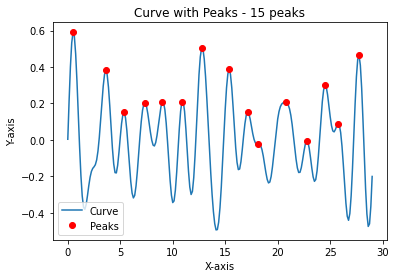

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

aux.finding_peaks(filtered_signal, fs = fs)


## Estimação de frequência de um instante

/home/oestefal/.sage/local/lib/python3.10/site-packages/PyEMD/EMD.py:768: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  dtype = np.find_common_type([x.dtype, y.dtype], [])


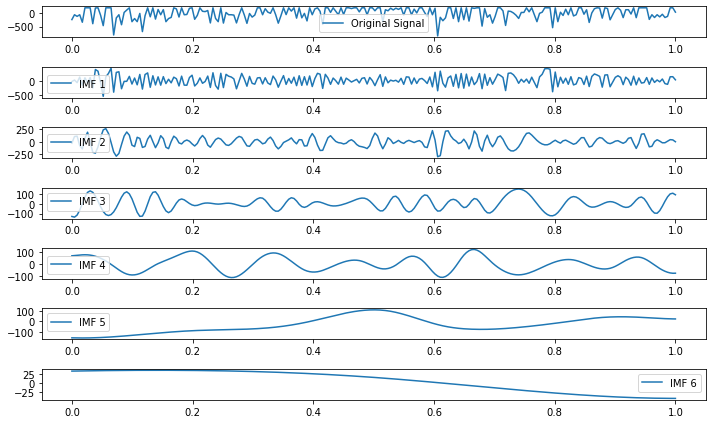

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PyEMD import EMD

# Generate a non-stationary signal
t = np.linspace(0, 1, 232)
## signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 20 * t) + np.random.normal(0, 0.2, size=len(t))

# Perform Empirical Mode Decomposition
emd = EMD()
imfs = emd(noisy_signal)

# Plot the original signal and the IMFs
plt.figure(figsize=(10, 6))

plt.subplot(len(imfs) + 1, 1, 1)
plt.plot(t, noisy_signal, label='Original Signal')
plt.legend()

for i, imf in enumerate(imfs):
    plt.subplot(len(imfs) + 1, 1, i + 2)
    plt.plot(t, imf, label=f'IMF {i + 1}')
    plt.legend()

plt.tight_layout()
plt.show()

/home/oestefal/.sage/local/lib/python3.10/site-packages/PyEMD/EMD.py:768: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  dtype = np.find_common_type([x.dtype, y.dtype], [])


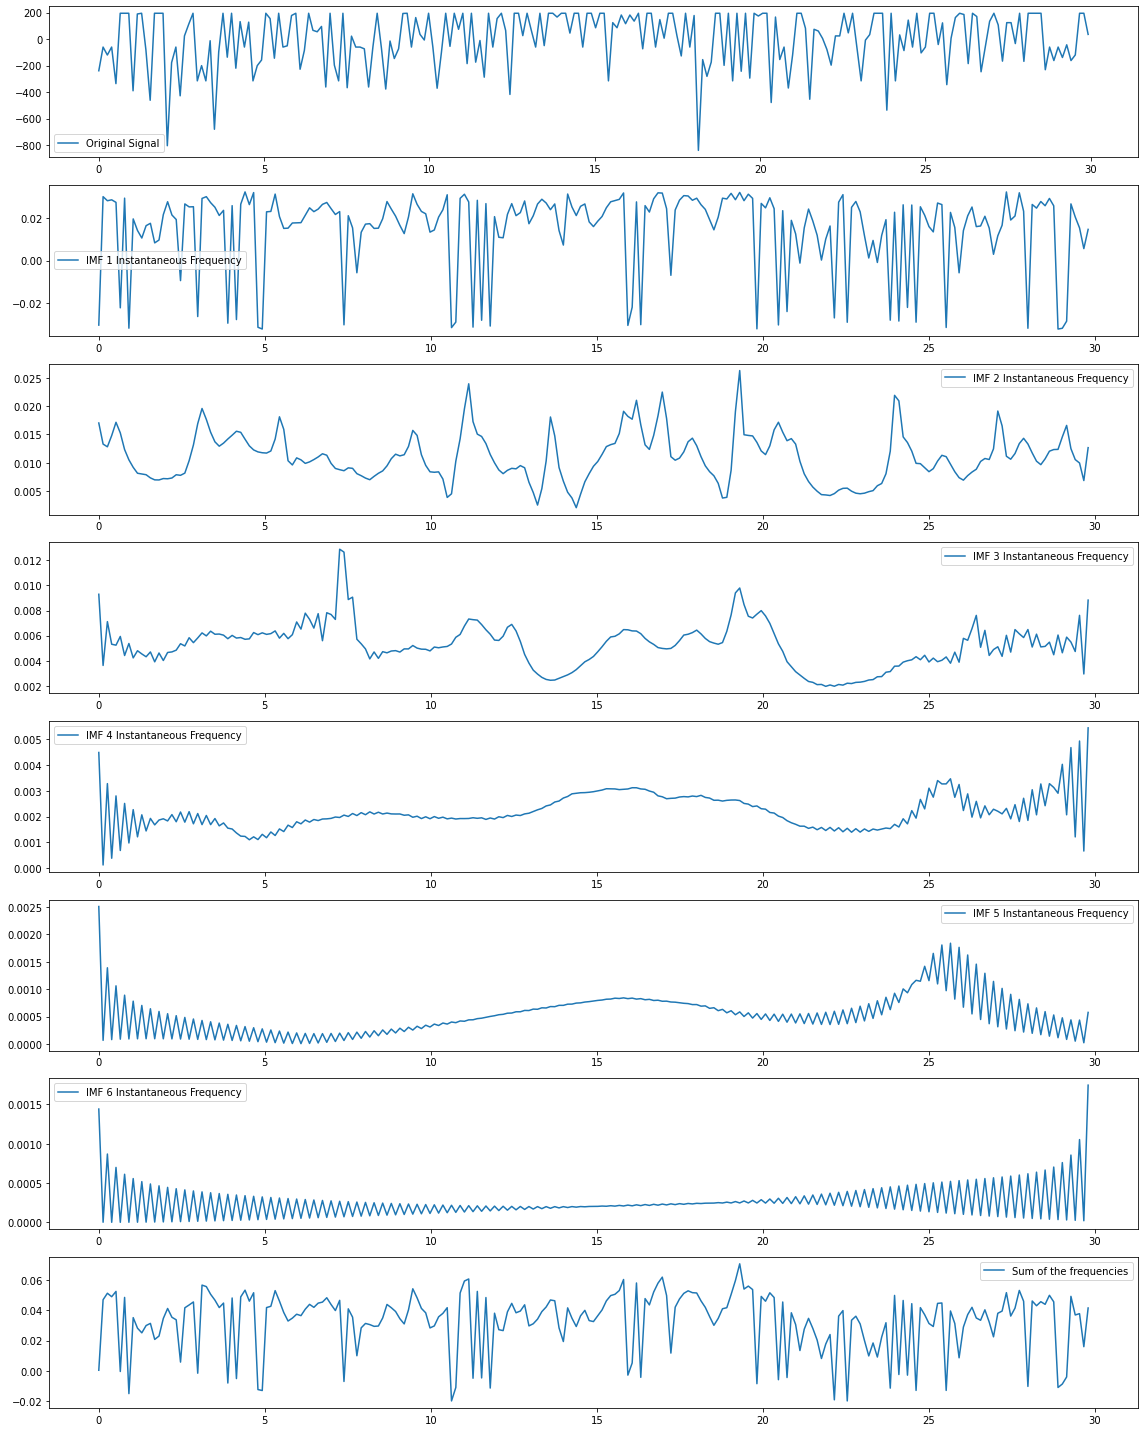

In [7]:
import numpy as np
from PyEMD import EMD
from scipy.signal import hilbert

def instantaneous_frequency_estimation(signal, sampling_rate):
    # Perform Empirical Mode Decomposition
    emd = EMD()
    imfs = emd(signal)

    # Initialize array for instantaneous frequencies
    instantaneous_frequencies = []

    for imf in imfs:
        # Compute the Hilbert transform
        analytic_signal = hilbert(imf)
        instantaneous_phase = np.unwrap(np.angle(analytic_signal))

        # Compute instantaneous frequency as the time derivative of instantaneous phase
        instantaneous_frequency = np.diff(instantaneous_phase) / (2 * np.pi / sampling_rate)

        # Append instantaneous frequency to the result
        instantaneous_frequencies.append(instantaneous_frequency)

    return instantaneous_frequencies

t = np.linspace(0, 29.919, 232)
sampling_rate = 29.919/data.size # Sampling frequency

# Estimate instantaneous frequencies
instantaneous_frequencies = instantaneous_frequency_estimation(noisy_signal, sampling_rate)

# Plot the original signal and instantaneous frequencies
plt.figure(figsize=(16, 20))

plt.subplot(len(instantaneous_frequencies) + 2, 1, 1)
plt.plot(t, noisy_signal, label='Original Signal')
plt.legend()

for i, inst_freq in enumerate(instantaneous_frequencies):
    plt.subplot(len(instantaneous_frequencies) + 2, 1, i + 2)
    plt.plot(t[:-1], inst_freq, label=f'IMF {i + 1} Instantaneous Frequency')
    plt.legend()

plt.subplot(len(instantaneous_frequencies) + 2, 1, len(instantaneous_frequencies) + 2)
plt.plot(t[:-1], instantaneous_frequencies[0] + 
         instantaneous_frequencies[1] + 
         instantaneous_frequencies[2] + 
         instantaneous_frequencies[3], label='Sum of the frequencies')
plt.legend()

    
plt.tight_layout()
plt.show()

## Checando por não estacionaridade local

In [8]:
import importlib
import aux
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.signal import welch, butter, filtfilt
importlib.reload(aux)

<module 'aux' from '/home/oestefal/Desktop/paradas_almir/NurseAid-Apnea/data_analisys/aux.py'>

In [9]:
import pandas as pd
data = pd.read_csv('samples.csv', header = None)
data = data.rename(columns={0: 'time_stamp', 1: 'value'})
data.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


,time_stamp,value
0,1706549552251,6451.349112
1,1706549552378,6630.000000
2,1706549552506,6570.022189
3,1706549552633,6630.000000
4,1706549552760,6354.102071


### Teste ADF para uma série temporal

Exemplo de <https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/>

In [10]:
# Load the dataset
df = sm.datasets.sunspots.load_pandas().data
# Check the dimensionality of the dataset
df.shape
print("Dataset has {} records and {} columns".format(df.shape[0], df.shape[1]))
# Changing the YEAR data type and setting it as index
df['YEAR'] = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
df.index = df['YEAR']
# Check the data type
del df['YEAR']

NameError: name 'sm' is not defined

In [11]:
import importlib
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import aux
importlib.reload(aux)

<module 'aux' from '/home/oestefal/Desktop/paradas_almir/NurseAid-Apnea/data_analisys/aux.py'>

When the test statistic is lower than the critical value shown, you reject the null hypothesis and infer that the time series is stationary.

In [22]:
result, is_stationary = aux.adf_test(data0d4Hz_back["value"].to_list())

print("ADF Statistic:", result[0])
print("P-value:", result[1])
print("Critical Values:", result[4])
print("type", type(result[4]))
print("Is Stationary:", is_stationary)

ADF Statistic: -6.829631476742602
P-value: 1.908314441516428e-09
Critical Values: {'1%': -3.460018927623594, '5%': -2.8745897386146817, '10%': -2.57372514086348}
type <class 'dict'>
Is Stationary: True


In [15]:
result, is_stationary = aux.adf_test(data["value"].to_list(), critical_value=0.01)

print("ADF Statistic:", result[0])
print("P-value:", result[1])
print("Critical Values:", result[4])
print("type", type(result[4]))
print("Is Stationary:", is_stationary)

ADF Statistic: -10.280275545350912
P-value: 3.795610545848272e-18
Critical Values: {'1%': -3.459105583381277, '5%': -2.8741898504150574, '10%': -2.5735117958412097}
type <class 'dict'>
Is Stationary: True


## Simulando ritmos respiratórios diversos e apnéia a partir de sample uniforme em 0.2Hz

In [142]:
import importlib
import aux_module as aux
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.signal import welch, butter, filtfilt
import statsmodels.api as sm
importlib.reload(aux)
import pandas as pd
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    data0d2Hz_left = pd.read_csv('../results/02_13_lucas_left_02hz_mean.csv', header = None)
    data0d2Hz_left = data0d2Hz_left.rename(columns={0: 'time_stamp', 1: 'value'})
    data0d2Hz_left = data0d2Hz_left.truncate(before=300, after=300+232)

data = data0d2Hz_left
data.head()

,time_stamp,value
300,1707860119118,236.631239
301,1707860119238,235.672107
302,1707860119366,233.836844
303,1707860119493,236.384539
304,1707860119621,235.134901


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


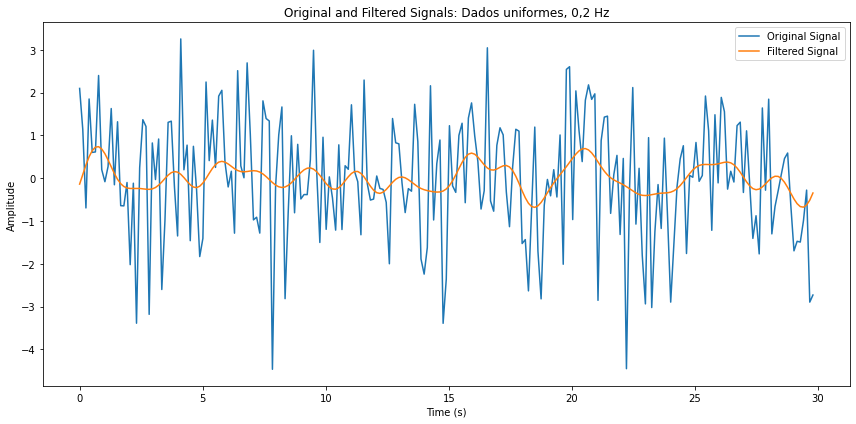

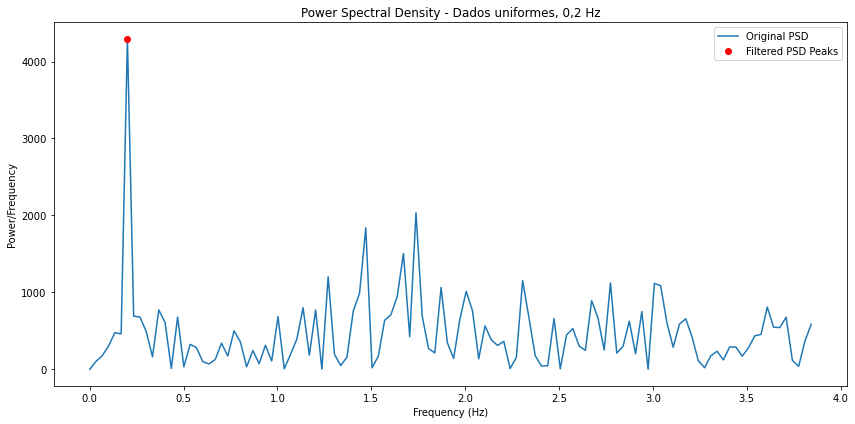

freq:  0.20054146194725764 - psd:  4293.721428080541


In [143]:
t = np.arange(0, 5, 1/fs)  # Time vector from 0 to 5 seconds
## t = np.linspace(0, 29.919, endpoint=False)
fs = data.size/29.919/2 # Sampling frequency

noisy_signal = data["value"].to_list()
noisy_signal = noisy_signal - np.mean(noisy_signal)

# Define the band mask and the number of most significant frequencies to keep
band_mask = (0.04, 0.7)  # Keep frequencies between 5 Hz and 30 Hz
n_most_significant = 1

# Process the signal
filtered_signal, filtered_frequencies, filtered_psd, filtered_fft, new_values= aux.filter_frequencies(noisy_signal, fs, band_mask, n_most_significant)

# Plot the results
freqs = np.fft.fftfreq(len(noisy_signal), 1/fs)
psd = np.abs(np.fft.fft(noisy_signal)) ** 2
aux.plot_signals(noisy_signal, filtered_signal, fs = fs, label = "Dados uniformes, 0,2 Hz")
aux.plot_spectral_densities(freqs, psd, filtered_frequencies, filtered_psd, fs = fs, label = "Dados uniformes, 0,2 Hz")

for i in range(n_most_significant):
    print("freq: ", filtered_frequencies[i], "- psd: ", filtered_psd[i])

Considere o modelo: 
- Regressão usando filter_frequencies, com erro a ser aprendido com métodos Bayesianos
- Homocedasticidade ao longo da regressão obtida por filter_frequencies

Para simular diferentes frequências de respiração, basta:
- Construir váriavel aleatória de ruído em volta da regressão obtida (filtered_signal)
- Amostrar da VA em sinais gerados por "escalas" das frequencias filtradas

E para simular os diferentes tipos de apnéia basta:
- Construir simulações dos diferentes tipos de apnéia usando soma de senos e cossenos
- Usar os coeficientes das simulações para gerar dados usando IFFT

### Verificando homocedasticidade dos erros


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


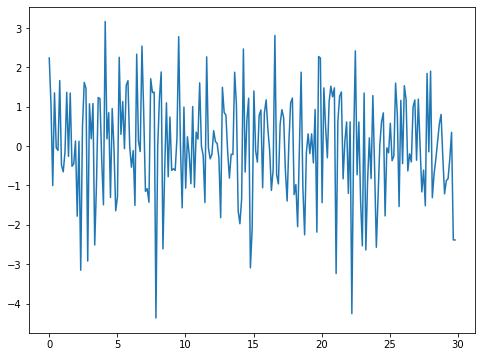

In [144]:
noise = noisy_signal - filtered_signal

plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(noise)) / fs, noise)

In [145]:
import statsmodels
from statsmodels.stats.diagnostic import het_breuschpagan
# Perform Breusch-Pagan test
exog = np.arange(len(noise))/fs
# Add a constant column to 'exog'
exog_with_constant = statsmodels.api.add_constant(exog)
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(noise, exog_with_constant)

# Print the test results
print("Breusch-Pagan Test:")
print(f"LM Statistic: {lm}")
print(f"LM P-Value: {lm_pvalue}")
print(f"F-Statistic: {fvalue}")
print(f"F P-Value: {f_pvalue}")

# Interpret the results
alpha = 0.05
if lm_pvalue < alpha:
    print("Reject the null hypothesis: Heteroscedasticity is present.")
else:
    print("Fail to reject the null hypothesis: No evidence of heteroscedasticity.")

Breusch-Pagan Test:
LM Statistic: 0.4452192366170743
LM P-Value: 0.5046140498948638
F-Statistic: 0.44224265491746156
F P-Value: 0.5067053802390252
Fail to reject the null hypothesis: No evidence of heteroscedasticity.


/home/oestefal/.sage/local/lib/python3.10/site-packages/numpy/core/_asarray.py:126: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = array(a, dtype=dtype, order=order, copy=False, subok=subok)


### Construindo VA do ruído

/home/oestefal/.sage/local/lib/python3.10/site-packages/numpy/lib/histograms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/home/oestefal/.sage/local/lib/python3.10/site-packages/numpy/lib/histograms.py:884: ComplexWarning: Casting complex values to real discards the imaginary part
  db = np.array(np.diff(bin_edges), float)
/usr/lib/python3/dist-packages/matplotlib/transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


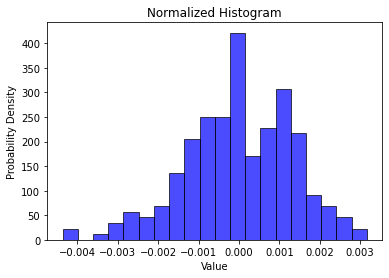

In [146]:
import numpy as np
import matplotlib.pyplot as plt

scaled_noise = noise/1000
aux.plot_normalized_histogram(scaled_noise, bins = 20)

Pelo teorema central do limite, a densidade da amostragem noise converge à distribuição da VA que a gera. Gerando mais dados com a densidade obtida:

233


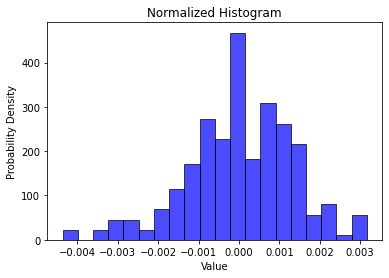

In [147]:
# Generate resamples
scaled_resampled_noise = aux.random_resample(scaled_noise, n_resamples=len(data))#*20) # <-------------------

# Plot samples
#plot_normalized_histogram(scaled_resampled_data)
print(scaled_resampled_noise.size)
aux.plot_normalized_histogram(scaled_resampled_noise, bins = 20)


### Simulando dados de respiração uniforme de frequência qualquer

Pra fazer isso, pegamos filtered_fft (coeficientes da decomposição discreta de Fourier) e suas respectivas frequências em filtered_frequencies. Usamos (INSIRA BIBLIOTECA AQUI) para gerar dados da curva desejada e tomamos ela como filtered_simulated_signal.

#### Dobrando frequência

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


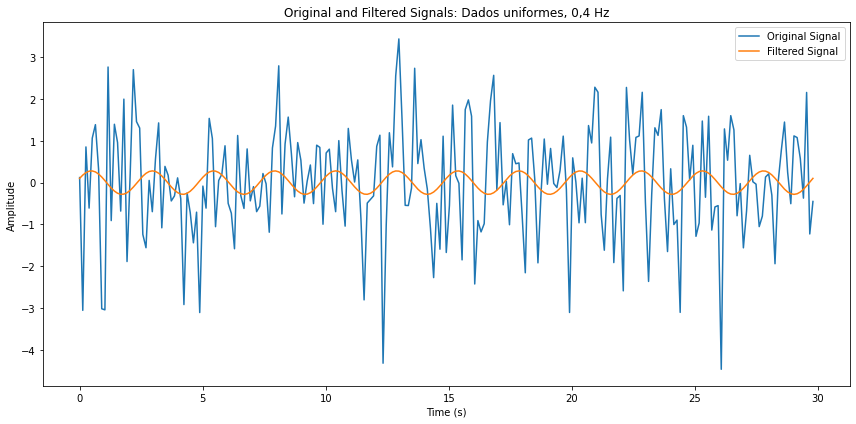

In [148]:
importlib.reload(aux)
freq_of_interest = 0.4
scale = freq_of_interest/0.2
filtered_simulated_signal_0p4Hz = aux.generate_signal(filtered_frequencies*scale, filtered_fft, len(scaled_resampled_noise), fs)
simulated_signal_0p4Hz = filtered_simulated_signal_0p4Hz + scaled_resampled_noise*1000 # <----- existe problema de escala mas deu certo
aux.plot_signals(simulated_signal_0p4Hz, filtered_simulated_signal_0p4Hz, fs = fs, label = "Dados uniformes, 0,4 Hz")

/usr/lib/python3/dist-packages/scipy/signal/_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


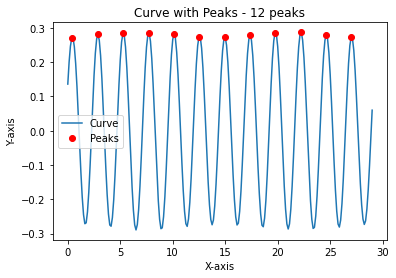

In [149]:
filtered_signal, filtered_frequencies, filtered_psd, filtered_fft, new_values = aux.filter_frequencies(filtered_simulated_signal_0p4Hz, fs, band_mask, n_most_significant)
aux.finding_peaks(np.array(filtered_signal), fs = fs)

In [150]:
peaks = find_peaks(filtered_signal)
estimated_freq_of_interest = len(peaks)*fs/len(filtered_signal)/2
estimated_freq_of_interest

/usr/lib/python3/dist-packages/scipy/signal/_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


0.0334235769912096

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


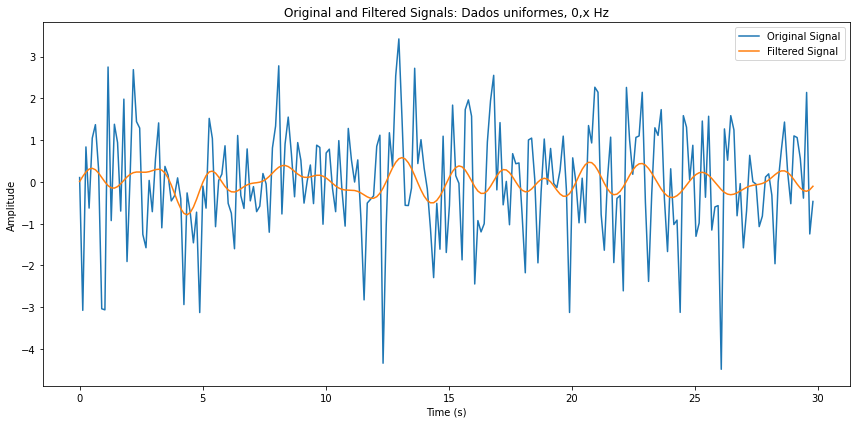

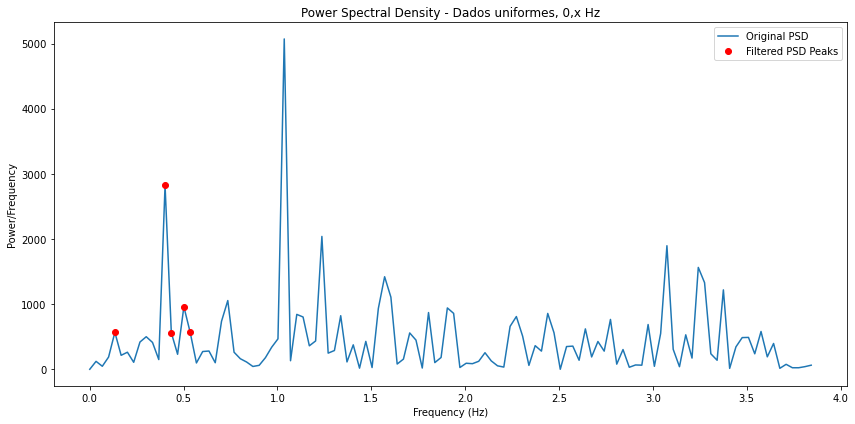

freq:  0.43450650088572484 - psd:  560.2811110204505
freq:  0.13369430796483842 - psd:  567.1134971322696
freq:  0.5347772318593537 - psd:  568.8579901729854
freq:  0.5013536548681441 - psd:  960.444458728795
freq:  0.4010829238945153 - psd:  2823.8035873087815


In [151]:
import importlib
import aux_module as aux
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.signal import welch, butter, filtfilt
importlib.reload(aux)

data = simulated_signal_0p4Hz

fs = len(scaled_noise)/29.919 # Sampling frequency

noisy_signal = data
noisy_signal = noisy_signal - np.mean(noisy_signal)

# Define the band mask and the number of most significant frequencies to keep
band_mask = (0.04, 0.7)
n_most_significant = 5

# Process the signal
filtered_signal, filtered_frequencies, filtered_psd, filtered_fft, new_values = aux.filter_frequencies(noisy_signal, fs, band_mask, n_most_significant)

# Plot the results
freqs = np.fft.fftfreq(len(noisy_signal), 1/fs)
psd = np.abs(np.fft.fft(noisy_signal)) ** 2
aux.plot_signals(noisy_signal, filtered_signal, fs = fs, label = "Dados uniformes, 0,x Hz")
aux.plot_spectral_densities(freqs, psd, filtered_frequencies, filtered_psd, fs = fs, label = "Dados uniformes, 0,x Hz")

for i in range(n_most_significant):
    print("freq: ", filtered_frequencies[i], "- psd: ", filtered_psd[i])

#### Simulando frequência continuamente variável

/home/oestefal/.sage/local/lib/python3.10/site-packages/numpy/lib/histograms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/home/oestefal/.sage/local/lib/python3.10/site-packages/numpy/lib/histograms.py:884: ComplexWarning: Casting complex values to real discards the imaginary part
  db = np.array(np.diff(bin_edges), float)
/usr/lib/python3/dist-packages/matplotlib/transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


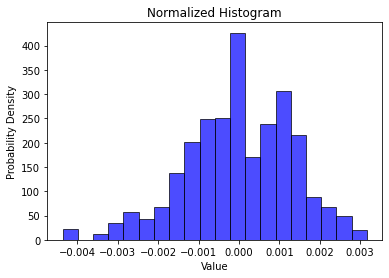

In [245]:
import numpy as np
import matplotlib.pyplot as plt

scaled_noise = noise/1000

# Generate resamples
scaled_resampled_noise = aux.random_resample(scaled_noise, n_resamples=len(data)*100) # <-------------------

# Plot samples
aux.plot_normalized_histogram(scaled_resampled_noise, bins = 20)


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


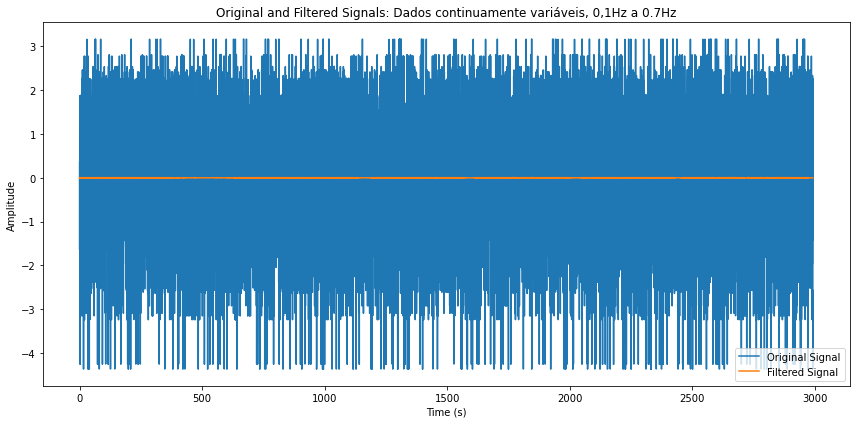

In [249]:
importlib.reload(aux)

scale = []
instantaneous_freq = []
k = 0.0009

for j in range(len(scaled_resampled_noise)):
    element = (np.sin(j*k) + np.sin(0.3*j*k))*3/4 + 2
    scale.append(element)
    instantaneous_freq.append(0.2*element)
    

filtered_simulated_continuously_variable_signal = aux.generate__continuously_variable_signal(filtered_frequencies, scale, filtered_fft, len(scaled_resampled_noise), fs)
simulated_continuously_variable_signal = filtered_simulated_continuously_variable_signal + scaled_resampled_noise*1000 # <----- existe problema de escala mas deu certo
aux.plot_signals(simulated_continuously_variable_signal, filtered_simulated_continuously_variable_signal, fs = fs, label = "Dados continuamente variáveis, 0,1Hz a 0.7Hz")

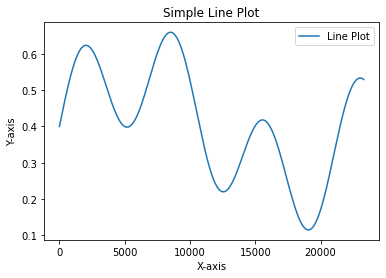

In [250]:
import matplotlib.pyplot as plt

# Sample data
x_values = range(len(instantaneous_freq))
y_values = instantaneous_freq
#y_values = scale

# Plotting the line
plt.plot(x_values, y_values, label='Line Plot')

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Line Plot')

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

### Criando dataframe de frequencias respiratorias pra teste

In [251]:
import pandas as pd

# Creating a DataFrame
df = pd.DataFrame({'simulated_continuously_variable_signal': np.real(simulated_continuously_variable_signal), 'instantaneous_freq': instantaneous_freq})

# Displaying the DataFrame
print("DataFrame:")
print(df.head())

# Writing the DataFrame to a CSV file
csv_filename = 'simulated_data_for_efficiency_measures.csv'
df.to_csv(csv_filename, index=False)

print(f"\nDataFrame has been written to {csv_filename}")

DataFrame:
   simulated_continuously_variable_signal  instantaneous_freq
0                                0.348991            0.400000
1                               -1.645318            0.400175
2                                0.123945            0.400351
3                                0.615137            0.400526
4                                1.285957            0.400702

DataFrame has been written to simulated_data_for_efficiency_measures.csv


### Simulação de ciclo de Cheyne-Strokes

Para fazer qualquer ritmo respiratorio não constante basta fazer uma transformação nao linear no calculo da inversa do FFT, como demostrado abaixo
(falta generalizar pra usar função qualquer no mesmo generate_signal)

In [178]:
result = []
n = len(noise)
freq = np.array(filtered_frequencies)
fft_coef = np.array(filtered_fft)
## t = np.arange(0, n, 1/fs)  # Time array
t = np.linspace(0, n/fs, num=n, endpoint=True, dtype=None, axis=0)
element = 0

variance = 3
mean = n/fs/2

for x in t:
    element = 0

    for j in range(len(freq)-6):
        
        f_i = 20*np.exp(-(x - mean)**2 / (2 * variance)) / np.sqrt(2 * np.pi * variance) # <----- a trasnformação de interesse entra nesse x
        coef = 30*np.exp(-(x - mean)**2 / (2 * 2*variance)) / np.sqrt(2 * np.pi * 2*variance)
        
        element += coef*fft_coef[j] * np.exp(1j * 2 * np.pi * freq[j] * f_i) 

    result.append(element/(len(t)))


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


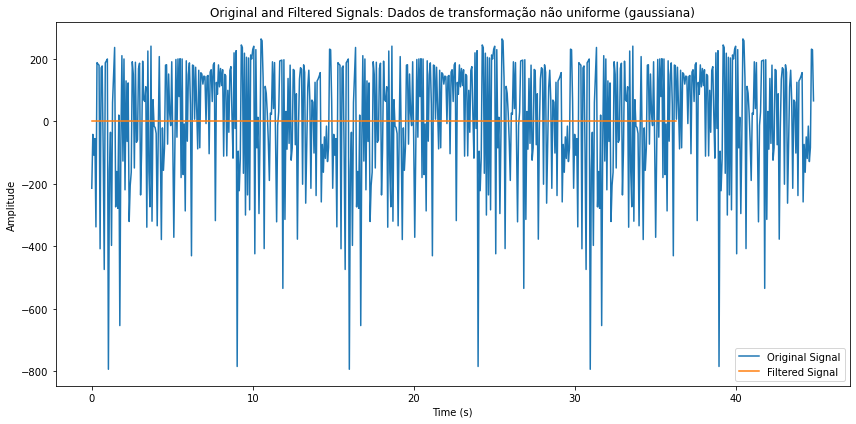

In [179]:
stokes_simulation = (result + noise).tolist() + (np.zeros(noise.size) + noise).tolist() + (result + noise).tolist()
stokes_mean_simulation = result + (np.zeros(100)).tolist() + result
aux.plot_signals(stokes_simulation, stokes_mean_simulation, fs = fs, label = "Dados de transformação não uniforme (gaussiana)")

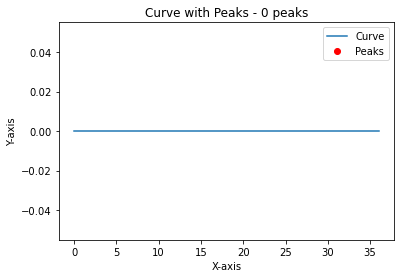

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

aux.finding_peaks(np.array(stokes_mean_simulation), fs = fs)

## Encontrando trechos de não estacionaridade em séries temporais localmente estacionárias por partes

esse vai dar um pouco de trabalho. A ideia é fazer um algoritmo recursivo que desça em arvores buscando por pontos de nao estacionaridade em series temporais, truncando os dados até um tamanho mínimo definido previamente.

Precisa:
- fazer algoritmo que recebe serie temporal e devolva trechos com informação de estacionaridade (triplas (int, int, boolean)) OK
- fazer algoritmo que recebe os trechos e tenta fazer merges para deixar o intervalos menores

In [181]:
time_series = data["value"].to_list() + simulated_signal_0p6Hz.real.tolist() + data["value"].to_list() + stokes_simulation + simulated_signal_0p6Hz.real.tolist()
time_series = np.real(time_series)

In [182]:
intervals = []
aux.recursive_binary_TEST(intervals, time_series, 0, len(time_series)-1, 0.1*fs) # modificando fs porque os dados são poucos

In [183]:
intervals

[(0, 202, True, 2.8830085772712135e-16),
 (203, 228, False, None),
 (229, 253, False, None),
 (254, 304, True, 1.1905750346145556e-10),
 (305, 405, True, 6.927019881904423e-07),
 (406, 456, True, 1.8006586594978956e-07),
 (457, 482, False, None),
 (483, 507, False, None),
 (508, 608, True, 5.368017325232045e-07),
 (609, 634, False, None),
 (635, 659, False, None),
 (660, 685, False, None),
 (686, 710, False, None),
 (711, 811, True, 4.397026592157208e-20),
 (812, 1623, True, 1.44210189769721e-08)]

In [184]:
clean_intervals = []
aux.intervals_cleaner(clean_intervals, intervals)

In [185]:
clean_intervals

[(0, 202, True),
 (203, 253, False),
 (254, 456, True),
 (457, 507, False),
 (508, 608, True),
 (609, 710, False),
 (711, 1623, True),
 (812, 1623, True)]

IMPORTANTE!!! NADA GARANTE QUE ESSA LISTA LIMPA TENHA OS INTERVALOS MERGADOS SENDO ESTACIONÁRIOS
SERVE APENAS PARA PLOT NO MOMENTO

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


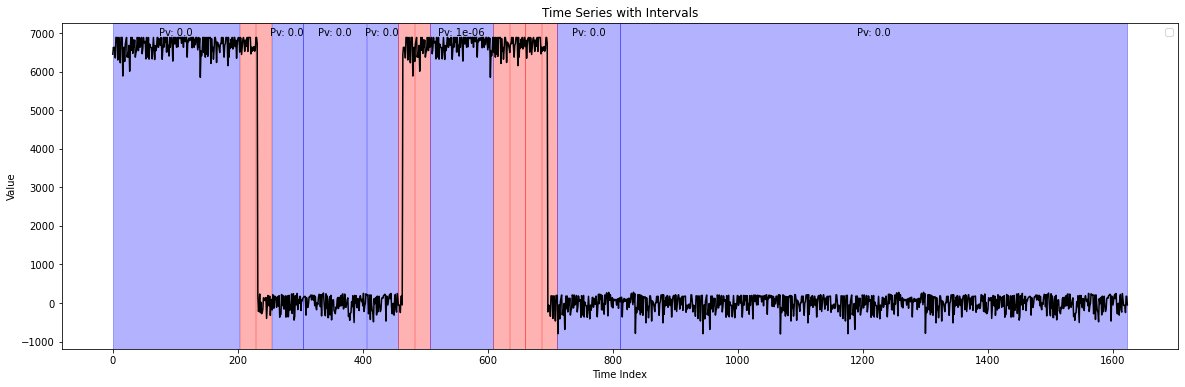

In [255]:
aux.plot_intervals(time_series, intervals, decimals = 6)

O ALGORITMO FALHOU EM RECONHECER STOKES!!!!!!!!!!!!!!!!!!!!

In [256]:
aux.adf_test(np.real(stokes_simulation), critical_value=0.05)

((-4.530027754311028,
  0.00017347991759654176,
  11,
  684,
  {'1%': -3.439946506895534,
   '5%': -2.8657747597081404,
   '10%': -2.5690251267911495},
  9051.036099627037),
 True)

## Testando estacionaridade especificamente em Stokes

In [257]:
import importlib
import aux
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.signal import welch, butter, filtfilt
importlib.reload(aux)

<module 'aux' from '/home/oestefal/Desktop/paradas_almir/NurseAid-Apnea/data_analisys/aux.py'>

In [258]:
#aux.adf_test(np.real(stokes_simulation), critical_value=0.05)
aux.adf_test(np.real(stokes_mean_simulation), critical_value=0.05)

((-4.247178857552571,
  0.0005476726816370741,
  19,
  544,
  {'1%': -3.4424279871882573,
   '5%': -2.8668676073304407,
   '10%': -2.569607433093642},
  -1861.202777119126),
 True)

### Tentando fazer regressão mesmo assim

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


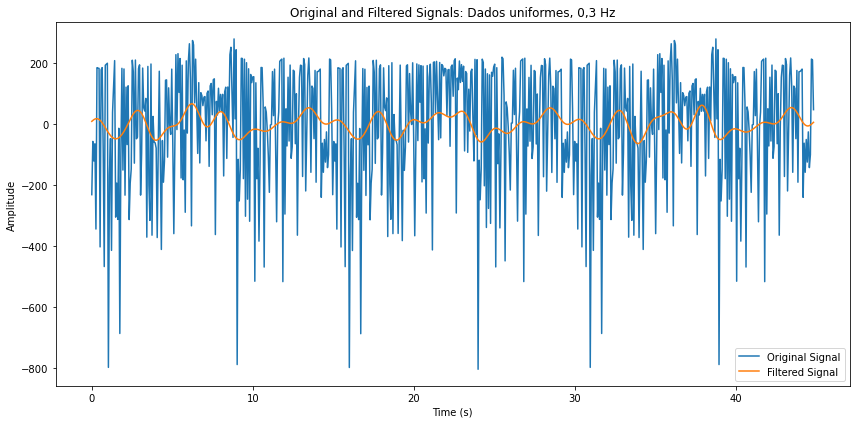

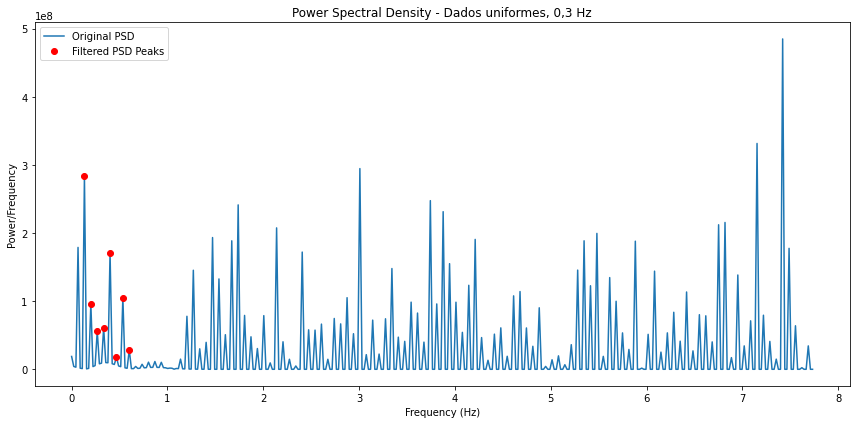

freq:  0.4679300778769344 - psd:  17772455.95217529
freq:  0.6016243858417728 - psd:  28453531.656357743
freq:  0.26738861592967683 - psd:  56200507.956535816
freq:  0.334235769912096 - psd:  61041657.79683927
freq:  0.2005414619472576 - psd:  96069610.98730068
freq:  0.5347772318593537 - psd:  105312998.33991966
freq:  0.4010829238945152 - psd:  170601551.7540769
freq:  0.13369430796483842 - psd:  283146597.3231706


In [340]:
# Define the band mask and the number of most significant frequencies to keep
band_mask = (0.1, 0.7)
n_most_significant = 8

# Process the signal
filtered_signal, filtered_frequencies, filtered_psd, filtered_fft, new_values = aux.filter_frequencies(stokes_simulation, fs, band_mask, n_most_significant)

# Plot the results
freqs = np.fft.fftfreq(len(stokes_simulation), 1/fs)
psd = np.abs(np.fft.fft(stokes_simulation)) ** 2
aux.plot_signals(stokes_simulation, filtered_signal, fs = fs, label = "Dados uniformes, 0,3 Hz")
aux.plot_spectral_densities(freqs, psd, filtered_frequencies, filtered_psd, fs = fs, label = "Dados uniformes, 0,3 Hz")

for i in range(n_most_significant):
    print("freq: ", filtered_frequencies[i], "- psd: ", filtered_psd[i])


/usr/lib/python3/dist-packages/scipy/signal/_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


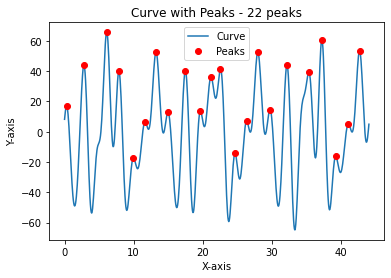

In [341]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

aux.finding_peaks(np.array(filtered_signal), fs = fs)

Deu ruim e tem que dar um jeito de identificar. Pra classificar os dados precisa:
- Encontrar momentos de movimento do paciente (OK)
- Encontrar momentos de apneia

Para decidir sobre apneia porvavelmente a melhor abordagem é atacar a amplitude

## Estabelecendo metricas de eficiencia (JEITO QUE DEU ERRADO)

- Gerar sinal de 5 frequencias respiratorias entre 0.1 e 0.7 e concatenar tudo
- Rodar algoritmos na serie temporal para separar em regioes estacionarias
- Rodar algoritmo que subdivide regiões estacionárias para fazer aferições locais
- Para cada regiao, estimar a frequencia respiratoria
- Calcular R² e RMSE e normalizar pela quantidade de regiões (normalização só é necessaria pra quando for comparar com sinais vindos de outras series temporais)

In [11]:
duration = (data["time_stamp"].to_list()[-1] - data["time_stamp"].to_list()[0])
fs = data.size/29.919 # Sampling frequency

noisy_signal = data["value"].to_list()
noisy_signal = noisy_signal - np.mean(noisy_signal)

# Define the band mask and the number of most significant frequencies to keep
band_mask = (0.1, 0.7)
n_most_significant = 5

# Process the signal
filtered_signal, filtered_frequencies, filtered_psd, filtered_fft, new_values= aux.filter_frequencies(noisy_signal, fs, band_mask, n_most_significant)

/usr/lib/python3/dist-packages/scipy/signal/_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


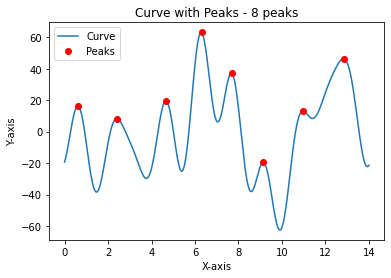

In [12]:
aux.finding_peaks(filtered_signal, fs)

In [13]:
importlib.reload(aux)
# gerando dados

signals = []
for i in np.arange(0.1, 0.8, 0.1):
    
    freq_of_interest = i
    scale = freq_of_interest/0.3
    noise = noisy_signal - filtered_signal
    scaled_noise = noise/1000
    scaled_resampled_noise = aux.random_resample(scaled_noise, n_resamples=len(data["value"].to_list()))
    
    filtered_simulated_signal = aux.generate_signal(filtered_frequencies*scale, filtered_fft, len(scaled_resampled_noise), fs)
    simulated_signal = filtered_simulated_signal + scaled_resampled_noise*1000
    #signals = np.real(np.concatenate((signals, simulated_signal)))
    signals = signals + np.ndarray.tolist(np.real(simulated_signal))



In [14]:
intervals = []
aux.recursive_binary_TEST(intervals, signals, 0, len(signals), fs)
intervals

[(0, 1624, True, 0.0)]

In [15]:
nyquist_magic_number = 50
aux.nyquist_truncator(intervals, nyquist_magic_number)

In [16]:
intervals

[(0, 50, True, 0.0),
 (50, 100, True, 0.0),
 (100, 150, True, 0.0),
 (150, 200, True, 0.0),
 (200, 250, True, 0.0),
 (250, 300, True, 0.0),
 (300, 350, True, 0.0),
 (350, 400, True, 0.0),
 (400, 450, True, 0.0),
 (450, 500, True, 0.0),
 (500, 550, True, 0.0),
 (550, 600, True, 0.0),
 (600, 650, True, 0.0),
 (650, 700, True, 0.0),
 (700, 750, True, 0.0),
 (750, 800, True, 0.0),
 (800, 850, True, 0.0),
 (850, 900, True, 0.0),
 (900, 950, True, 0.0),
 (950, 1000, True, 0.0),
 (1000, 1050, True, 0.0),
 (1050, 1100, True, 0.0),
 (1100, 1150, True, 0.0),
 (1150, 1200, True, 0.0),
 (1200, 1250, True, 0.0),
 (1250, 1300, True, 0.0),
 (1300, 1350, True, 0.0),
 (1350, 1400, True, 0.0),
 (1400, 1450, True, 0.0),
 (1450, 1500, True, 0.0),
 (1500, 1550, True, 0.0),
 (1550, 1624, True, 0.0)]

In [17]:
filtered_signal, filtered_frequencies, filtered_psd, filtered_fft, new_values = aux.filter_frequencies(noisy_signal, fs, band_mask, n_most_significant)

In [18]:
import numpy as np
from scipy.signal import find_peaks
def evaluate_R2a(intervals, signals):
    
    R2 = 0
    freq_of_interest = 0
    
    for element in intervals:
    
        if (element[2] == True):

            beginning = element[0]
            ending = element[1]

            # descobre qual é a frequencia que deveria ser
            
            if(0 < beginning and beginning < 1*1624/7):
                freq_of_interest = 0.1
            elif (1*1624/7 < beginning and beginning < 2*1624/7):
                freq_of_interest = 0.2
            elif (2*1624/7 < beginning and beginning < 3*1624/7):
                freq_of_interest = 0.3
            elif (3*1624/7 < beginning and beginning < 4*1624/7):
                freq_of_interest = 0.4
            elif (4*1624/7 < beginning and beginning < 5*1624/7):
                freq_of_interest = 0.5
            elif (5*1624/7 < beginning and beginning < 6*1624/7):
                freq_of_interest = 0.6
            elif (6*1624/7 < beginning and beginning < 7*1624/7):
                freq_of_interest = 0.7

            noisy_signal = signals[beginning:ending]

            filtered_signal, _, _, _, _ = aux.filter_frequencies(noisy_signal, fs, band_mask, n_most_significant)

            peaks, _ = find_peaks(filtered_signal)

            estimated_freq_of_interest = len(peaks)*fs/len(noisy_signal)/2

            R2 += (estimated_freq_of_interest - freq_of_interest)**2


    return R2

def evalueate_RMSEa(intervals, signals):
    
    RMSE = 0
    freq_of_interest = 0
    
    for element in intervals:
    
        if (element[2] == True):

            beginning = element[0]
            ending = element[1]

            # descobre qual é a frequencia que deveria ser
            
            if(0 < beginning and beginning < 1*1624/7):
                freq_of_interest = 0.1
            elif (1*1624/7 < beginning and beginning < 2*1624/7):
                freq_of_interest = 0.2
            elif (2*1624/7 < beginning and beginning < 3*1624/7):
                freq_of_interest = 0.3
            elif (3*1624/7 < beginning and beginning < 4*1624/7):
                freq_of_interest = 0.4
            elif (4*1624/7 < beginning and beginning < 5*1624/7):
                freq_of_interest = 0.5
            elif (5*1624/7 < beginning and beginning < 6*1624/7):
                freq_of_interest = 0.6
            elif (6*1624/7 < beginning and beginning < 7*1624/7):
                freq_of_interest = 0.7

            noisy_signal = signals[beginning:ending]

            filtered_signal, _, _, _, _ = aux.filter_frequencies(noisy_signal, fs, band_mask, n_most_significant)

            peaks, _ = find_peaks(filtered_signal)

            estimated_freq_of_interest = len(peaks)*fs/len(noisy_signal)/2

            RMSE += np.absolute(estimated_freq_of_interest - freq_of_interest)

    return RMSE


FAZER AS PARADINHAS ACIMA E COLETAR OS VALORES PRA FAZER TABELA BONITINHO

In [19]:
evaluate_R2(intervals, signals)

/usr/lib/python3/dist-packages/scipy/signal/_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


1.6407589313589224

In [20]:
evalueate_RMSE(intervals, signals)

6.255125324863617

### Plotando graficos das paradinhas acima

In [21]:
def predict(predicted, real, intervals, signals):
    
    R2 = 0
    freq_of_interest = 0
    
    for element in intervals:
        
        print(element)
        
        beginning = element[0]
        ending = element[1]

        # descobre qual é a frequencia que deveria ser

        if(0 < beginning and beginning < 1*1624/7):
            freq_of_interest = 0.1
        elif (1*1624/7 <= beginning and beginning <= 2*1624/7):
            freq_of_interest = 0.2
        elif (2*1624/7 <= beginning and beginning <= 3*1624/7):
            freq_of_interest = 0.3
        elif (3*1624/7 <= beginning and beginning <= 4*1624/7):
            freq_of_interest = 0.4
        elif (4*1624/7 <= beginning and beginning <= 5*1624/7):
            freq_of_interest = 0.5
        elif (5*1624/7 <= beginning and beginning <= 6*1624/7):
            freq_of_interest = 0.6
        elif (6*1624/7 <= beginning and beginning <= 7*1624/7):
            freq_of_interest = 0.7
                
        print(freq_of_interest)        
        
        if (element[2] == True):

            noisy_signal = signals[beginning:ending]

            filtered_signal, _, _, _, _ = aux.filter_frequencies(noisy_signal, fs, band_mask, n_most_significant)

            peaks, _ = find_peaks(filtered_signal)
            print(peaks)

            estimated_freq_of_interest = len(peaks)*fs/len(noisy_signal)/2

            
            predicted.append(estimated_freq_of_interest)
            real.append(freq_of_interest)
            
        else:
            real.append(0)
            predicted.append(0)

    return 

In [22]:
predicted = []
real= []
predict(predicted, real, intervals, signals)

(0, 50, True, 0.0)
0
[11 36]
(50, 100, True, 0.0)
0.100000000000000
[ 5 30]
(100, 150, True, 0.0)
0.100000000000000
[ 6 31]
(150, 200, True, 0.0)
0.100000000000000
[22 47]
(200, 250, True, 0.0)
0.100000000000000
[15 40]
(250, 300, True, 0.0)
0.200000000000000
[11 36]
(300, 350, True, 0.0)
0.200000000000000
[25]
(350, 400, True, 0.0)
0.200000000000000
[10 35]
(400, 450, True, 0.0)
0.200000000000000
[12 37]
(450, 500, True, 0.0)
0.200000000000000
[ 9 34]
(500, 550, True, 0.0)
0.300000000000000
[11 36]
(550, 600, True, 0.0)
0.300000000000000
[16 41]
(600, 650, True, 0.0)
0.300000000000000
[20 45]
(650, 700, True, 0.0)
0.300000000000000
[13 38]
(700, 750, True, 0.0)
0.400000000000000
[25]
(750, 800, True, 0.0)
0.400000000000000
[24]
(800, 850, True, 0.0)
0.400000000000000
[19 44]
(850, 900, True, 0.0)
0.400000000000000
[25]
(900, 950, True, 0.0)
0.400000000000000
[17 42]
(950, 1000, True, 0.0)
0.500000000000000
[19 44]
(1000, 1050, True, 0.0)
0.500000000000000
[ 2 27]
(1050, 1100, True, 0.

In [23]:
predicted

[0.3101707944784251,
 0.3101707944784251,
 0.3101707944784251,
 0.3101707944784251,
 0.3101707944784251,
 0.3101707944784251,
 0.15508539723921255,
 0.3101707944784251,
 0.3101707944784251,
 0.3101707944784251,
 0.3101707944784251,
 0.3101707944784251,
 0.3101707944784251,
 0.3101707944784251,
 0.15508539723921255,
 0.15508539723921255,
 0.3101707944784251,
 0.15508539723921255,
 0.3101707944784251,
 0.3101707944784251,
 0.3101707944784251,
 0.3101707944784251,
 0.3101707944784251,
 0.3101707944784251,
 0.3101707944784251,
 0.3101707944784251,
 0.3101707944784251,
 0.3101707944784251,
 0.3101707944784251,
 0.3101707944784251,
 0.3101707944784251,
 0.3143622917011065]

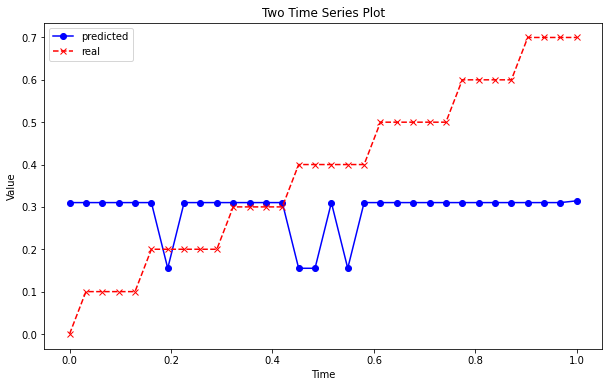

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example time series data
time_points = np.linspace(0, 1, len(real))
series1 = predicted
series2 = real

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(time_points, series1, label='predicted', linestyle='-', marker='o', color='blue')
plt.plot(time_points, series2, label='real', linestyle='--', marker='x', color='red')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Two Time Series Plot')
plt.legend()  # Show legend with labels

# Display the plot
plt.show()


## Estatísticas da VA de ruído

/home/oestefal/.sage/local/lib/python3.10/site-packages/numpy/lib/histograms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/home/oestefal/.sage/local/lib/python3.10/site-packages/numpy/lib/histograms.py:884: ComplexWarning: Casting complex values to real discards the imaginary part
  db = np.array(np.diff(bin_edges), float)
/usr/lib/python3/dist-packages/matplotlib/transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


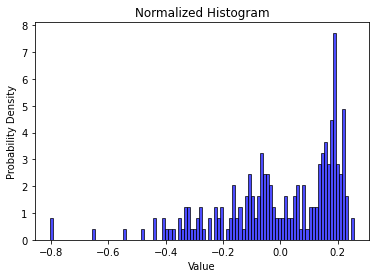

In [25]:
import numpy as np
import matplotlib.pyplot as plt

scaled_noise = noise/1000
aux.plot_normalized_histogram(scaled_noise)

Mean: -1.7419016420842972e-16
Median: 0.04741826862278885
Standard Deviation: 0.2027004734234735
Minimum Value: -0.8035096234561423
Maximum Value: 0.25709073074411953


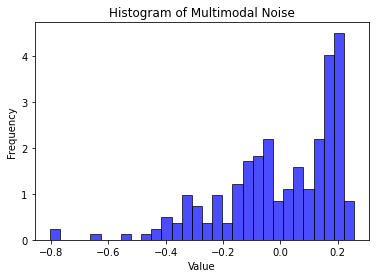

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Assuming your multimodal noise array is named 'multimodal_noise'
# Replace this line with your actual multimodal noise array
multimodal_noise = np.real(scaled_noise)

# Basic statistics
mean_value = np.mean(multimodal_noise)
median_value = np.median(multimodal_noise)
std_deviation = np.std(multimodal_noise)
min_value = np.min(multimodal_noise)
max_value = np.max(multimodal_noise)



# Display the results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")


# Plot histogram for visualization
plt.hist(multimodal_noise, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Multimodal Noise')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Fazendo plots gerais

### Importando dados

In [1]:
import pandas as pd

with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    ## importing left

    data0d1Hz_left = pd.read_csv('../results/02_15_lucas_left_01hz_mean.csv', header = None)
    data0d2Hz_left = pd.read_csv('../results/02_13_lucas_left_02hz_mean.csv', header = None)
    data0d3Hz_left = pd.read_csv('../results/02_09_lucas_left_03hz_mean.csv', header = None)
    data0d4Hz_left = pd.read_csv('../results/02_13_lucas_left_04hz_mean.csv', header = None)
    data0d5Hz_left = pd.read_csv('../results/02_13_lucas_left_05hz_mean.csv', header = None)

    data0d1Hz_left = data0d1Hz_left.rename(columns={0: 'time_stamp', 1: 'value'})
    data0d2Hz_left = data0d2Hz_left.rename(columns={0: 'time_stamp', 1: 'value'})
    data0d3Hz_left = data0d3Hz_left.rename(columns={0: 'time_stamp', 1: 'value'})
    data0d4Hz_left = data0d4Hz_left.rename(columns={0: 'time_stamp', 1: 'value'})
    data0d5Hz_left = data0d5Hz_left.rename(columns={0: 'time_stamp', 1: 'value'})

    data0d1Hz_left = data0d1Hz_left.truncate(before=100, after=100+232)
    data0d2Hz_left = data0d2Hz_left.truncate(before=300, after=300+232)
    data0d3Hz_left = data0d3Hz_left.truncate(before=100, after=100+232)
    data0d4Hz_left = data0d4Hz_left.truncate(before=300, after=300+232)
    data0d5Hz_left = data0d5Hz_left.truncate(before=300, after=300+232)

    ## importing back

    data0d1Hz_back = pd.read_csv('../results/02_15_lucas_back_01hz_mean.csv', header = None)
    data0d2Hz_back = pd.read_csv('../results/02_13_lucas_back_02hz_mean.csv', header = None)
    data0d3Hz_back = pd.read_csv('../results/02_09_lucas_back_03hz_mean.csv', header = None)
    data0d4Hz_back = pd.read_csv('../results/02_13_lucas_back_04hz_mean.csv', header = None)
    data0d5Hz_back = pd.read_csv('../results/02_13_lucas_back_05hz_mean.csv', header = None)

    data0d1Hz_back = data0d1Hz_back.rename(columns={0: 'time_stamp', 1: 'value'})
    data0d2Hz_back = data0d2Hz_back.rename(columns={0: 'time_stamp', 1: 'value'})
    data0d3Hz_back = data0d3Hz_back.rename(columns={0: 'time_stamp', 1: 'value'})
    data0d4Hz_back = data0d4Hz_back.rename(columns={0: 'time_stamp', 1: 'value'})
    data0d5Hz_back = data0d5Hz_back.rename(columns={0: 'time_stamp', 1: 'value'})

    data0d1Hz_back = data0d1Hz_back.truncate(before=500, after=500+232)
    data0d2Hz_back = data0d2Hz_back.truncate(before=500, after=500+232)
    data0d3Hz_back = data0d3Hz_back.truncate(before=500, after=500+232)
    data0d4Hz_back = data0d4Hz_back.truncate(before=300, after=300+232)
    data0d5Hz_back = data0d5Hz_back.truncate(before=200, after=200+232)

    ## importing right

    data0d1Hz_right = pd.read_csv('../results/02_15_lucas_right_01hz_mean.csv', header = None)
    data0d2Hz_right = pd.read_csv('../results/02_15_lucas_right_02hz_mean.csv', header = None)

    data0d1Hz_right = data0d1Hz_right.rename(columns={0: 'time_stamp', 1: 'value'})
    data0d2Hz_right = data0d2Hz_right.rename(columns={0: 'time_stamp', 1: 'value'})

    data0d1Hz_right = data0d1Hz_right.truncate(before=300, after=300+232)
    data0d1Hz_right = data0d1Hz_right.truncate(before=300, after=300+232)
    

ParserError: Error tokenizing data. C error: Expected 1 fields in line 2, saw 2


In [ ]:
import pandas as pd

#data0d2Hz_right = pd.read_csv('../results/02_13_lucas_right_02hz_mean.csv', header = None)

### Verificando se dados dão certo individualmente

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


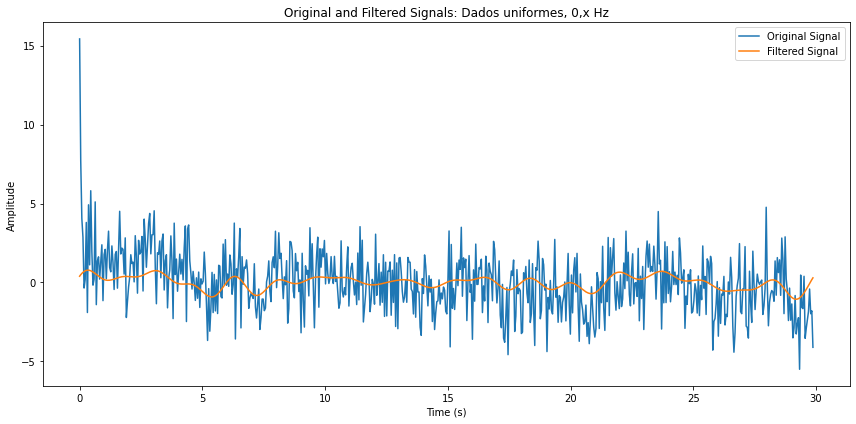

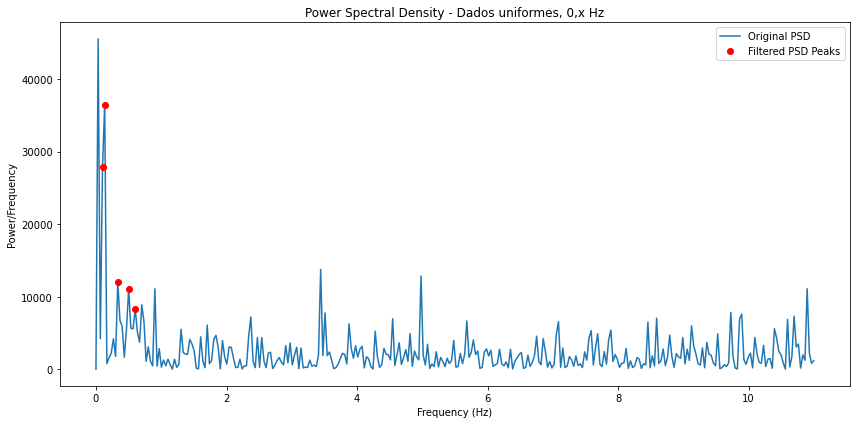

freq:  0.6016243858417727 - psd:  8278.727722616064
freq:  0.501353654868144 - psd:  11045.740286931306
freq:  0.33423576991209597 - psd:  12070.834478191851
freq:  0.10027073097362879 - psd:  27884.914360444123
freq:  0.1336943079648384 - psd:  36417.25372431887


In [7]:
import importlib
import aux_module as aux
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.signal import welch, butter, filtfilt
importlib.reload(aux)

#data = data0d2Hz_back
data = data0d2Hz_right

duration = (data["time_stamp"].to_list()[-1] - data["time_stamp"].to_list()[0])
fs = data.size/29.919/2 # Sampling frequency

noisy_signal = data["value"].to_list()
noisy_signal = noisy_signal - np.mean(noisy_signal)

# Define the band mask and the number of most significant frequencies to keep
band_mask = (0.04, 0.7)
n_most_significant = 5

# Process the signal
filtered_signal, filtered_frequencies, filtered_psd, filtered_fft, new_values = aux.filter_frequencies(noisy_signal, fs, band_mask, n_most_significant)

# Plot the results
freqs = np.fft.fftfreq(len(noisy_signal), 1/fs)
psd = np.abs(np.fft.fft(noisy_signal)) ** 2
aux.plot_signals(noisy_signal, filtered_signal, fs = fs, label = "Dados uniformes, 0,x Hz")
aux.plot_spectral_densities(freqs, psd, filtered_frequencies, filtered_psd, fs = fs, label = "Dados uniformes, 0,x Hz")

for i in range(n_most_significant):
    print("freq: ", filtered_frequencies[i], "- psd: ", filtered_psd[i])

/usr/lib/python3/dist-packages/scipy/signal/_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


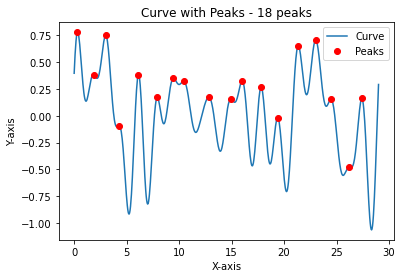

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

aux.finding_peaks(filtered_signal, fs = fs)

In [9]:
peaks, _ = find_peaks(filtered_signal)
estimated_freq_of_interest = len(peaks)*fs/len(noisy_signal)
estimated_freq_of_interest

/usr/lib/python3/dist-packages/scipy/signal/_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


0.6016243858417728

In [10]:
filtered_frequencies.mean()

0.3342357699120959

In [11]:
np.median(filtered_frequencies)

0.33423576991209597

### plot comparando back 0.1, 0.2, 0.3, 0.4, 0.5 no espaço de frequencias

In [141]:
_, filtered_frequencies_0d1Hz_back, filtered_psd_0d1Hz_back, _, _ = aux.filter_frequencies(data0d1Hz_back["value"].to_list(), fs, band_mask, 1)
_, filtered_frequencies_0d2Hz_back, filtered_psd_0d2Hz_back, _, _ = aux.filter_frequencies(data0d2Hz_back["value"].to_list(), fs, band_mask, 1)
_, filtered_frequencies_0d3Hz_back, filtered_psd_0d3Hz_back, _, _ = aux.filter_frequencies(data0d3Hz_back["value"].to_list(), fs, band_mask, 1)
_, filtered_frequencies_0d4Hz_back, filtered_psd_0d4Hz_back, _, _ = aux.filter_frequencies(data0d4Hz_back["value"].to_list(), fs, band_mask, 1)
_, filtered_frequencies_0d5Hz_back, filtered_psd_0d5Hz_back, _, _ = aux.filter_frequencies(data0d5Hz_back["value"].to_list(), fs, band_mask, 1)

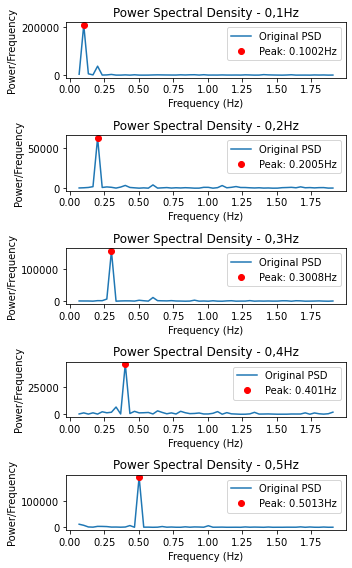

In [149]:
import matplotlib.pyplot as plt
import numpy as np
import math

freqs = [np.fft.fftfreq(len(data0d1Hz_back["value"].to_list()), 1/fs),
        np.fft.fftfreq(len(data0d2Hz_back["value"].to_list()), 1/fs),
        np.fft.fftfreq(len(data0d3Hz_back["value"].to_list()), 1/fs),
        np.fft.fftfreq(len(data0d4Hz_back["value"].to_list()), 1/fs),
        np.fft.fftfreq(len(data0d5Hz_back["value"].to_list()), 1/fs)]

psd = [np.abs(np.fft.fft(data0d1Hz_back["value"].to_list())) ** 2,
      np.abs(np.fft.fft(data0d2Hz_back["value"].to_list())) ** 2,
      np.abs(np.fft.fft(data0d3Hz_back["value"].to_list())) ** 2,
      np.abs(np.fft.fft(data0d4Hz_back["value"].to_list())) ** 2,
      np.abs(np.fft.fft(data0d5Hz_back["value"].to_list())) ** 2]

filtered_frequencies = [filtered_frequencies_0d1Hz_back, 
       filtered_frequencies_0d2Hz_back, 
       filtered_frequencies_0d3Hz_back, 
       filtered_frequencies_0d4Hz_back, 
       filtered_frequencies_0d5Hz_back]

filtered_psd = [filtered_psd_0d1Hz_back,
               filtered_psd_0d2Hz_back,
               filtered_psd_0d3Hz_back,
               filtered_psd_0d4Hz_back,
               filtered_psd_0d5Hz_back]

size = len(np.fft.fftfreq(len(data0d1Hz_back["value"].to_list()), 1/fs))/2

# Create a 5x1 grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(5, 8))

# Plot the data in each subplot
for i in range(5):

    plt.subplot(5, 1, i+1)
    plt.plot(freqs[i][2:int(size/2)], psd[i][2:int(size/2)], label='Original PSD')
    plt.plot(filtered_frequencies[i], filtered_psd[i], 'ro', label='Peak: ' + str(float(math.trunc(filtered_frequencies[i][0]*10000)/10000)) + "Hz")
    plt.title('Power Spectral Density - 0,' + str(i+1) + "Hz")
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency')
    plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig("../figures/comparison_frequencies.png")

# Show the plot
plt.show()


### plot comparando 0.2 back, right, left

In [143]:
_, filtered_frequencies_0d2Hz_back, filtered_psd_0d2Hz_back, _, _ = aux.filter_frequencies(data0d2Hz_back["value"].to_list(), fs, band_mask, 1)
_, filtered_frequencies_0d2Hz_right, filtered_psd_0d2Hz_right, _, _ = aux.filter_frequencies(data0d2Hz_right["value"].to_list(), fs, band_mask, 1)
_, filtered_frequencies_0d2Hz_left, filtered_psd_0d2Hz_left, _, _ = aux.filter_frequencies(data0d2Hz_left["value"].to_list(), fs, band_mask, 1)

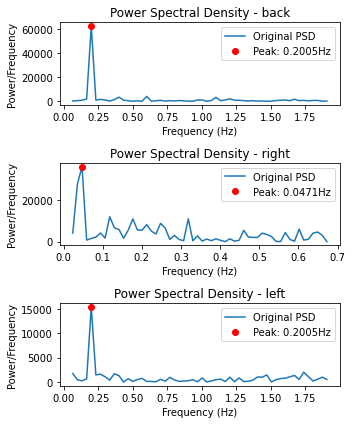

In [150]:
import matplotlib.pyplot as plt
import numpy as np
import math

freqs = [np.fft.fftfreq(len(data0d2Hz_back["value"].to_list()), 1/fs),
        np.fft.fftfreq(len(data0d2Hz_right["value"].to_list()), 1/fs),
        np.fft.fftfreq(len(data0d2Hz_left["value"].to_list()), 1/fs)]

psd = [np.abs(np.fft.fft(data0d2Hz_back["value"].to_list())) ** 2,
      np.abs(np.fft.fft(data0d2Hz_right["value"].to_list())) ** 2,
      np.abs(np.fft.fft(data0d2Hz_left["value"].to_list())) ** 2]

filtered_frequencies = [filtered_frequencies_0d2Hz_back, 
       filtered_frequencies_0d2Hz_right, 
       filtered_frequencies_0d2Hz_left]

filtered_psd = [filtered_psd_0d2Hz_back,
                filtered_psd_0d2Hz_right,
                filtered_psd_0d2Hz_left]

size = len(np.fft.fftfreq(len(data0d1Hz_back["value"].to_list()), 1/fs))/2

decubitus = ["back", 
             "right", 
             "left"]

# Create a 3x1 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 6))

# Plot the data in each subplot
for i in range(3):

    plt.subplot(3, 1, i+1)
    plt.plot(freqs[i][2:int(size/2)], psd[i][2:int(size/2)], label='Original PSD')
    plt.plot(filtered_frequencies[i], filtered_psd[i], 'ro', label='Peak: ' + str(float(math.trunc(filtered_frequencies[i][0]*10000)/10000)) + "Hz")
    plt.title('Power Spectral Density - ' + decubitus[i])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency')
    plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig("../figures/comparison_decubitus.png")

# Show the plot
plt.show()


## Análise exploratoria dos parâmetros ideais para geração de sinal

In [17]:
import pandas as pd

df = pd.read_csv('../grid_search_results.csv')

df.columns

Index(['window_size', 'window_step', 'min_temp', 'max_temp',
       'gaussian_blur_kernel_size', 'mask_type', 'bandpass_low_cut',
       'bandpass_high_cut', 'mask_low_accuracy', 'mask_borders',
       'dilate_kernel_size', 'id', 'rmse', 'mae', 'r2',
       'true_respiratory_frequency', 'author', 'position', 'date'],
      dtype='object')

In [18]:
df['rmse'].idxmin()

6

In [19]:
df['mae'].idxmin()

6

In [20]:
df.iloc[[df['rmse'].idxmin()]]

,window_size,window_step,min_temp,max_temp,gaussian_blur_kernel_size,mask_type,bandpass_low_cut,bandpass_high_cut,mask_low_accuracy,mask_borders,dilate_kernel_size,id,rmse,mae,r2,true_respiratory_frequency,author,position,date
6,60,60,18,32,1,otsu,0.1,0.7,True,5,3,2485627211915875887,0.001374,0.001374,-inf,0.2,lucas,left,2


## Medindo eficiência com sinal artificial

Passo a passo: 
- Gerar series temporais de tamanhos iguais de cada tipo, junto de uma lista de frequencias respiratorias de referência
- Truncar por estacionaridade (ok)
- Truncar por tamanho maximo (ok)
- Fazer função que avalia R2 e RMSE 

E por fim
- Plotar a brincadeira
- Rodar de forma automatizada variando os parametros pra ver qual é o ideal


### Fazendo a magia

- R2 TÁ ERRADO!!
- O METODO CORRETO É PEGAR A FREQUENCIA DE PICO!!

In [252]:
import random
import numpy as np

def evaluate_MAE(intervals, signals, reference):
    
    MAE = 0
    MAEs = []
    index = []
    freq_of_interest = 0
    
    for element in intervals:
    
        if (element[2] == True):

            beginning = element[0]
            ending = element[1]
            
            freq_of_interest = reference[(beginning + ending)//2]

            noisy_signal = signals[beginning:ending]

            _, filtered_frequencies, _, _, _ = aux.filter_frequencies(noisy_signal, fs, band_mask, n_most_significant)

            estimated_freq_of_interest = np.real(filtered_frequencies[0])
            
            inst_error = np.absolute(estimated_freq_of_interest - freq_of_interest)
            MAE += np.absolute(estimated_freq_of_interest - freq_of_interest)
            
            
            MAEs.append(inst_error)
            index.append((beginning + ending)//2)


    return MAE/len(reference), MAEs, index



In [274]:
import pandas as pd

df = pd.read_csv('simulated_data_for_efficiency_measures.csv')
simulated_continuously_variable_signal = df["simulated_continuously_variable_signal"].to_list()
instantaneous_freq = df["instantaneous_freq"].to_list()

simulated_continuously_variable_signal = simulated_continuously_variable_signal
instantaneous_freq = instantaneous_freq

In [279]:
band_mask = [0.04, 0.7]
n_most_significant = 1

intervals = []
aux.recursive_binary_TEST(intervals, simulated_continuously_variable_signal, 0, len(simulated_continuously_variable_signal)-1, fs) 

nyquist_magic_number = 15
aux.nyquist_truncator(intervals, nyquist_magic_number)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


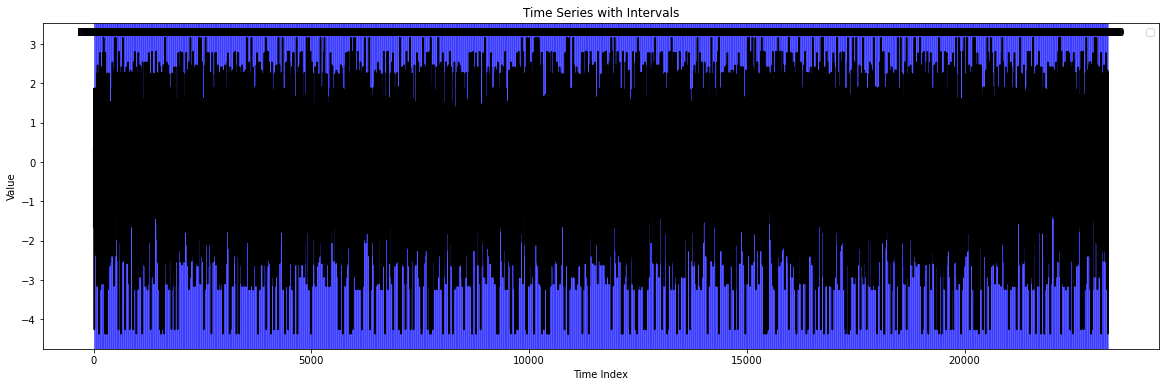

In [280]:
aux.plot_intervals(simulated_continuously_variable_signal, intervals, decimals = 6)

In [281]:
MAE, MAEs, index = evaluate_MAE(intervals, simulated_continuously_variable_signal, instantaneous_freq)
MAE

0.010014688514789101

O codigo abaixo é so uma base, tem que ajustar á necessidade (coletar os valores predicted)

23300


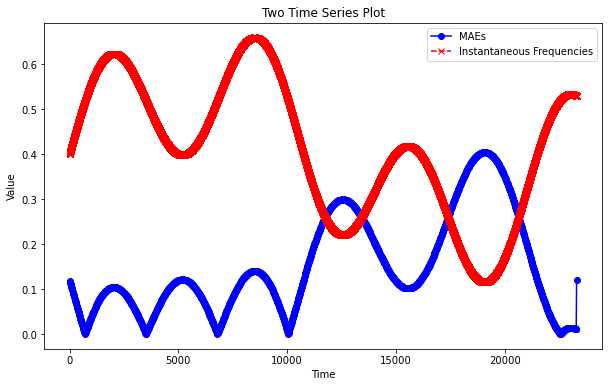

In [283]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example time series data
time_points = np.linspace(0, len(instantaneous_freq), len(instantaneous_freq))

series1 = MAEs
series2 = instantaneous_freq

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
print(len(series2))
plt.plot(index, series1, label='MAEs', linestyle='-', marker='o', color='blue')
plt.plot(time_points, series2, label='Instantaneous Frequencies', linestyle='--', marker='x', color='red')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Two Time Series Plot')
plt.legend()  # Show legend with labels

# Display the plot
plt.show()
